# Notebook 3: Two Qubits & CNOT 🔗

📘 **Notebook 3/7**: Two Qubits & CNOT  
⏱️ **Estimated Duration**: 15 min  
🎯 **What You'll Learn**:
   - Multi-qubit systems and exponential state space growth
   - The CNOT gate: conditional operations between qubits
   - Creating Bell states: maximally entangled qubit pairs
   - The no-cloning theorem: why you can't copy quantum states

**Progress**: ⬛⬛⬛⬜⬜⬜⬜ (3/7)

---

### 🎯 Why This Notebook Matters

So far, we've worked with single qubits. But the **real power** of quantum computing comes from **multiple qubits working together**.

With 2 qubits, we unlock:
- **Entanglement**: Qubits that are mysteriously correlated, no matter how far apart
- **Exponential state space**: 2 qubits = 4 states, 50 qubits = more states than atoms in the universe!
- **Quantum teleportation** (Notebook 6): Transfer quantum states using entanglement
- **Quantum algorithms**: Most require entangled multi-qubit states

This is where quantum gets truly powerful! 🚀

## 🤔 INTUITION: From One Coin to Two Magic Coins

### 🎲 Classical: Two Independent Dice

Imagine rolling two dice:
- Die 1 shows a number (1-6)
- Die 2 shows a number (1-6)
- **They are independent**: knowing die 1 tells you nothing about die 2

### 🪙 Quantum: Two Magically Linked Coins

Now imagine two "quantum coins" that are **entangled**:
- You flip both coins while they're far apart (even light-years away!)
- You look at coin 1: it shows Heads
- **Instantly**, coin 2 is guaranteed to show Heads too!

This isn't because the coins were secretly pre-programmed. They were genuinely undecided until measured. This is **quantum entanglement** — what Einstein called "spooky action at a distance."

### 🔗 The CNOT Gate Creates This Link

Today, we'll learn the **CNOT gate** — the quantum operation that creates this mysterious correlation between qubits.

## Section 1: Environment Setup

Let's import our tools for working with multi-qubit systems.

In [1]:
# Quantum computing framework
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere

# Visualization and numerical tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Custom plotting utilities
import sys
sys.path.append('..')
from utils.plotting import configure_beautiful_plots, COLORS

# Configure beautiful plots
configure_beautiful_plots()

# Create simulator
simulator = AerSimulator()

print("✅ All imports successful!")
print("✅ Ready to explore multi-qubit systems")

✅ All imports successful!
✅ Ready to explore multi-qubit systems


## Section 2: Two Classical Bits - Independent States

With 2 classical bits, we have **4 possible configurations**:
- 00 (both at 0)
- 01 (first at 0, second at 1)
- 10 (first at 1, second at 0)
- 11 (both at 1)

**Important**: The bits are **independent**.  
Changing bit 1 does NOT affect bit 2.

📊 Classical results (2 independent bits):
   00: 271 times (~27%)
   01: 255 times (~26%)
   10: 229 times (~23%)
   11: 245 times (~24%)


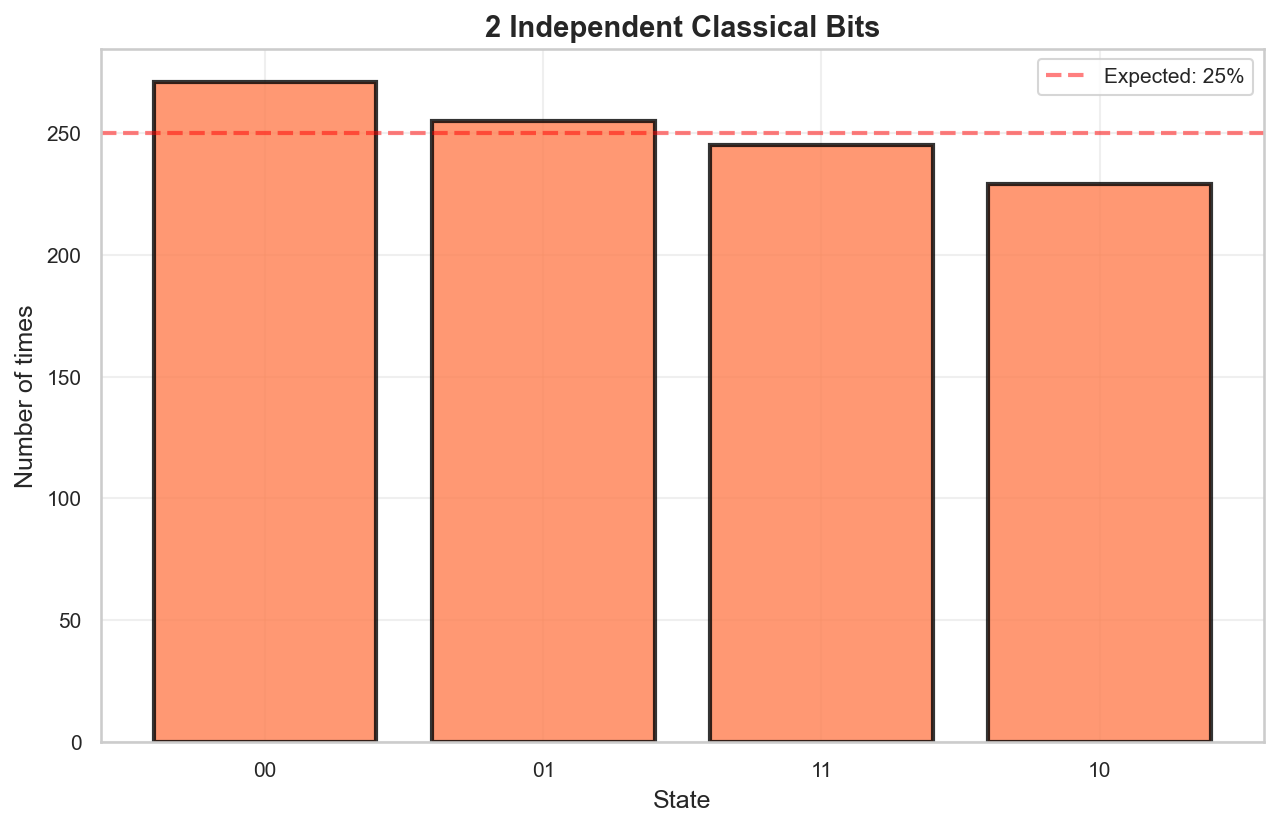


✅ Uniform distribution: each state appears ~25% of the time
   The bits are INDEPENDENT: knowing bit1 tells us nothing about bit2


In [2]:
# Classical simulation: 2 independent random bits
import random

def generate_2bits():
    """Generate 2 independent random bits"""
    bit1 = random.randint(0, 1)
    bit2 = random.randint(0, 1)
    return f"{bit1}{bit2}"

# Generate 1000 pairs
results = [generate_2bits() for _ in range(1000)]
counts_classical = Counter(results)

print("📊 Classical results (2 independent bits):")
for state, count in sorted(counts_classical.items()):
    print(f"   {state}: {count} times (~{count/10:.0f}%)")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
ax.bar(counts_classical.keys(), counts_classical.values(),
       color=COLORS['classical'], edgecolor='black', linewidth=2, alpha=0.8)
ax.set_xlabel('State', fontsize=12)
ax.set_ylabel('Number of times', fontsize=12)
ax.set_title('2 Independent Classical Bits', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=250, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Expected: 25%')
ax.legend()
plt.show()

print("\n✅ Uniform distribution: each state appears ~25% of the time")
print("   The bits are INDEPENDENT: knowing bit1 tells us nothing about bit2")

## 💡 CONCEPT: Two Quantum Qubits

Now let's see how quantum systems with 2 qubits differ fundamentally from classical 2-bit systems.

## Section 3: Two Quantum Qubits - Exponential State Space

With 2 qubits, we also have **4 basis states**: |00⟩, |01⟩, |10⟩, |11⟩

**BUT**: A 2-qubit system can be in **superposition** of all 4 states!

$$|\psi\rangle = \alpha|00\rangle + \beta|01\rangle + \gamma|10\rangle + \delta|11\rangle$$

Where:
- α, β, γ, δ are **complex amplitudes**
- Probabilities: $|\alpha|^2 + |\beta|^2 + |\gamma|^2 + |\delta|^2 = 1$

### 🌌 Hilbert Space - Exponential Growth

The space of possible states grows **exponentially**:
- 1 qubit: 2 dimensions $(2^1)$
- 2 qubits: 4 dimensions $(2^2)$
- 10 qubits: 1024 dimensions $(2^{10})$
- 50 qubits: $10^{15}$ dimensions $(2^{50})$! 🤯

**This exponential growth is the origin of quantum computational power.**

## 💻 IMPLEMENTATION: Creating a 2-Qubit Circuit

Circuit with 2 qubits:


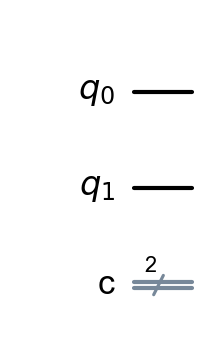


📝 Circuit structure:
   • q[0]: First qubit (top line)
   • q[1]: Second qubit (bottom line)
   • c[0], c[1]: Classical bits for measurement results


In [3]:
# Create a circuit with 2 qubits and 2 classical bits
qc_2q = QuantumCircuit(2, 2)
#                      ↑  ↑
#                      │  └─ 2 classical bits (to store results)
#                      └──── 2 quantum qubits

# Visualize the circuit
print("Circuit with 2 qubits:")
display(qc_2q.draw('mpl'))

print("\n📝 Circuit structure:")
print("   • q[0]: First qubit (top line)")
print("   • q[1]: Second qubit (bottom line)")
print("   • c[0], c[1]: Classical bits for measurement results")

## 📊 VISUALIZATION: Initial 2-Qubit State

Initial statevector:
[1.+0.j 0.+0.j 0.+0.j 0.+0.j]

📝 Interpretation:
   Index 0 (|00⟩): amplitude = 1+0j → probability = 100%
   Index 1 (|01⟩): amplitude = 0+0j → probability = 0%
   Index 2 (|10⟩): amplitude = 0+0j → probability = 0%
   Index 3 (|11⟩): amplitude = 0+0j → probability = 0%

✅ By default: |00⟩ (both qubits start at |0⟩)


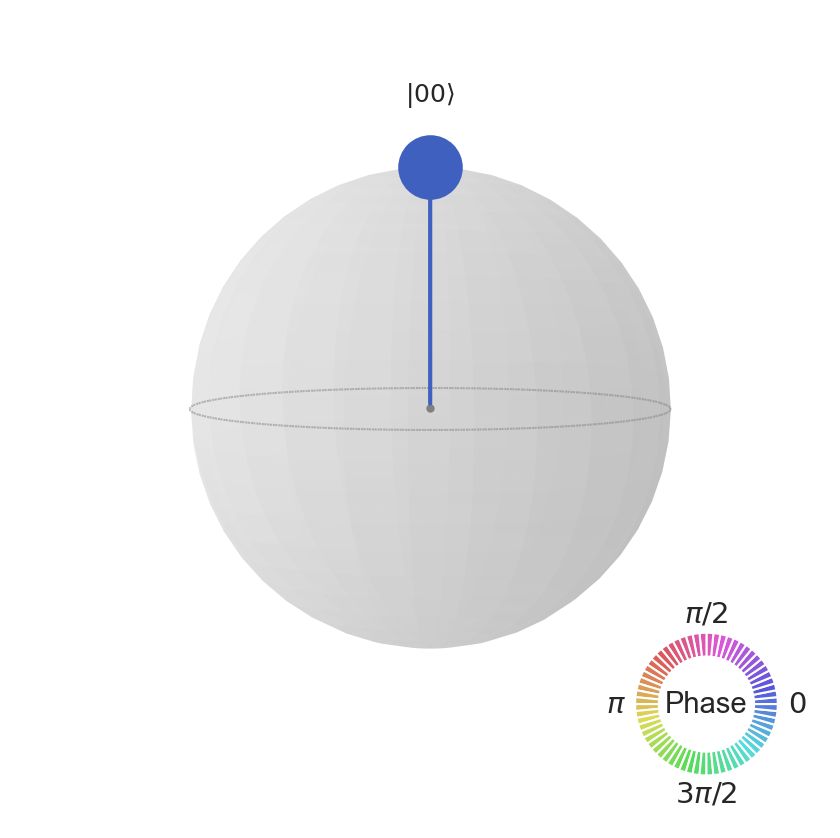

In [4]:
# Get the initial statevector
sv_2q = Statevector(qc_2q)

print("Initial statevector:")
print(sv_2q.data)
print("\n📝 Interpretation:")
print("   Index 0 (|00⟩): amplitude = 1+0j → probability = 100%")
print("   Index 1 (|01⟩): amplitude = 0+0j → probability = 0%")
print("   Index 2 (|10⟩): amplitude = 0+0j → probability = 0%")
print("   Index 3 (|11⟩): amplitude = 0+0j → probability = 0%")
print("\n✅ By default: |00⟩ (both qubits start at |0⟩)")

# Visualize on Q-sphere
display(plot_state_qsphere(sv_2q))

## 🎯 CHECKPOINT 1: Can you...

Before continuing, verify your understanding:

- [ ] Explain why 2 qubits have 4 basis states?
- [ ] Understand that superposition means being in ALL 4 states simultaneously?
- [ ] See how the state space grows exponentially with number of qubits?

If yes to all, let's discover the CNOT gate! 🚀

---

## 💡 CONCEPT: The CNOT Gate - Control & Target

The **CNOT** (Controlled-NOT) gate is THE fundamental 2-qubit gate in quantum computing.

## Section 4: CNOT - Conditional Bit Flip

### 🎮 Principle

**CNOT** operates on two qubits:
1. **Control qubit** - decides whether to act
2. **Target qubit** - gets flipped (or not)

**Rule**:
- If control = |0⟩ → do nothing to target
- If control = |1⟩ → apply X gate to target (flip it)

### 📊 Truth Table

| Control | Target | → | Control | Target |
|---------|--------|---|---------|--------|
| 0 | 0 | → | 0 | 0 |
| 0 | 1 | → | 0 | 1 |
| 1 | 0 | → | 1 | **1** |
| 1 | 1 | → | 1 | **0** |

**Observation**: Target changes ONLY when control = 1!

### 🔄 Circuit Notation

```
q0 (control): ──●──
                │
q1 (target):  ──⊕──
```

- ● = control qubit
- ⊕ = target qubit (gets X gate when control = 1)

## 💻 IMPLEMENTATION: Testing CNOT on All Basis States

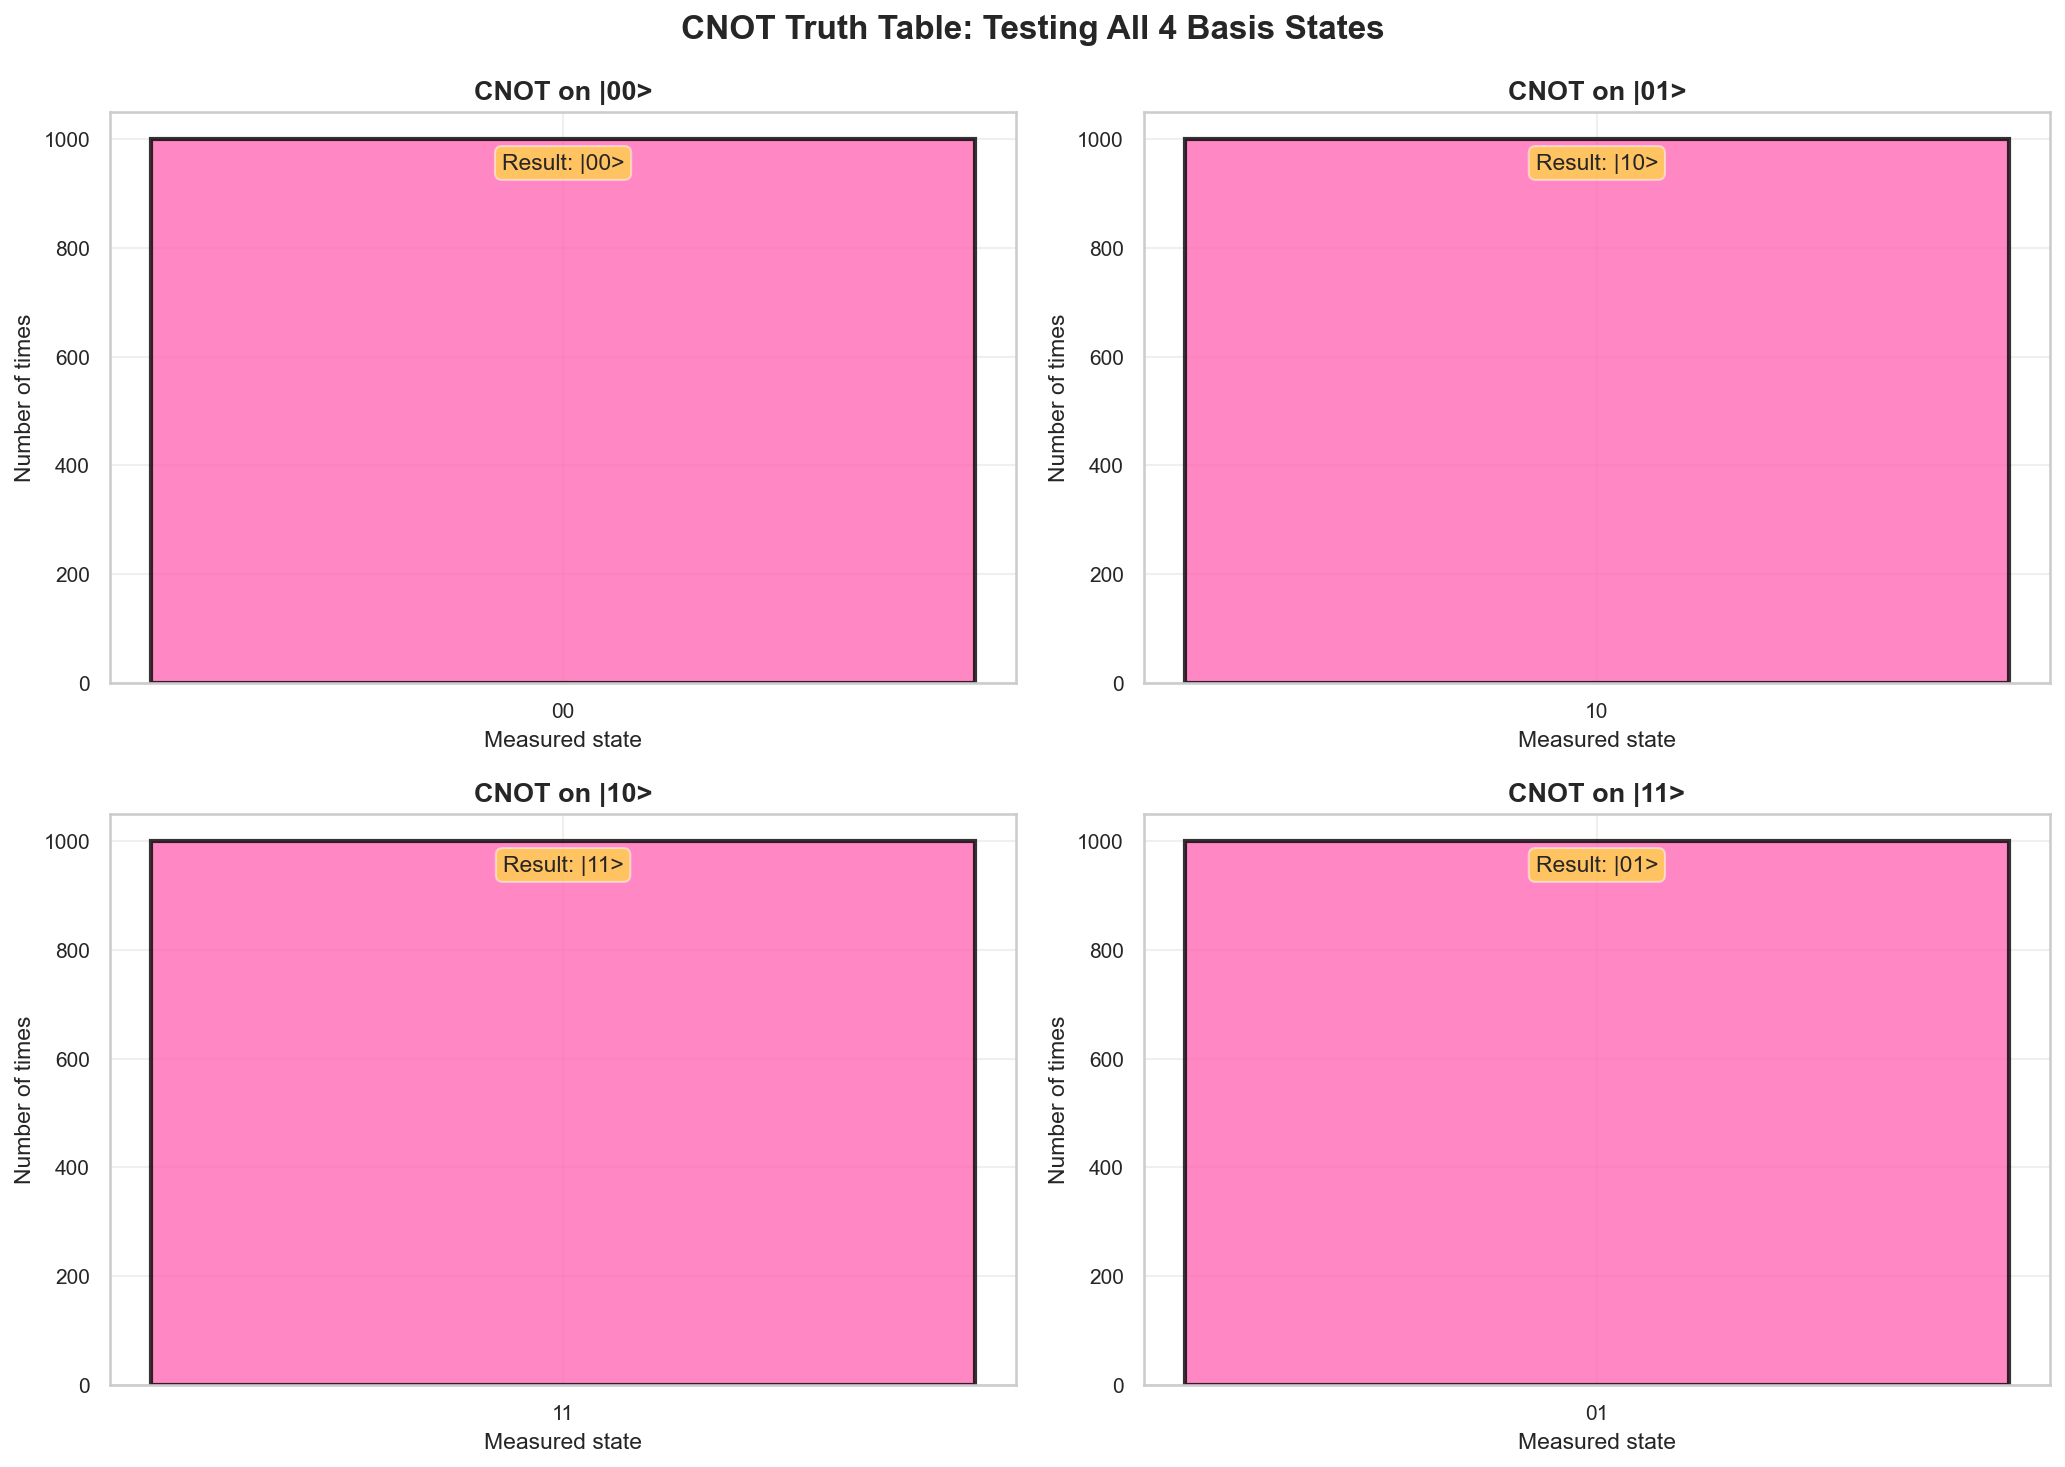

✅ CNOT behavior verified:
   • |00> → |00>  (control=0, no change)
   • |01> → |01>  (control=0, no change)
   • |10> → |11>  (control=1, target flipped!)
   • |11> → |10>  (control=1, target flipped!)


In [5]:
# Test CNOT on the 4 basis states
# We'll prepare each state, apply CNOT, then measure

test_cases = [
    ('00', []),                    # |00> - no preparation needed
    ('01', [('x', 1)]),           # |01> - flip q1
    ('10', [('x', 0)]),           # |10> - flip q0
    ('11', [('x', 0), ('x', 1)])  # |11> - flip both
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10), dpi=150)
axes = axes.flatten()

for idx, (label, preparation_gates) in enumerate(test_cases):
    # Create circuit
    qc = QuantumCircuit(2, 2)
    
    # Prepare the initial state
    for gate_type, qubit in preparation_gates:
        if gate_type == 'x':
            qc.x(qubit)
    
    # Apply CNOT (q0 = control, q1 = target)
    qc.cx(0, 1)
    
    # Measure both qubits
    qc.measure([0, 1], [0, 1])
    
    # Execute
    counts = simulator.run(qc, shots=1000).result().get_counts()
    
    # Visualize
    ax = axes[idx]
    ax.bar(counts.keys(), counts.values(), color=COLORS['primary'],
           edgecolor='black', linewidth=2, alpha=0.8)
    ax.set_title(f'CNOT on |{label}>', fontsize=13, fontweight='bold')
    ax.set_xlabel('Measured state', fontsize=11)
    ax.set_ylabel('Number of times', fontsize=11)
    ax.grid(axis='y', alpha=0.3)
    
    # Annotate expected result
    expected = list(counts.keys())[0]
    ax.text(0.5, 0.9, f'Result: |{expected}>',
            transform=ax.transAxes, ha='center', fontsize=11,
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.suptitle('CNOT Truth Table: Testing All 4 Basis States', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ CNOT behavior verified:")
print("   • |00> → |00>  (control=0, no change)")
print("   • |01> → |01>  (control=0, no change)")
print("   • |10> → |11>  (control=1, target flipped!)")
print("   • |11> → |10>  (control=1, target flipped!)")

## 📊 VISUALIZATION: CNOT Circuit Diagram

CNOT Gate Circuit:


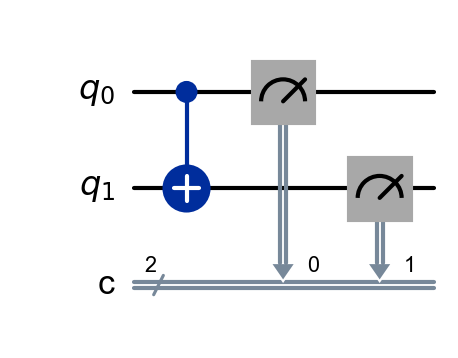


📝 Reading the circuit:
   • ● on q[0] = control qubit
   • ⊕ on q[1] = target qubit (receives X if control=1)
   • Vertical line connects control and target


In [6]:
# Create a clean CNOT circuit for visualization
qc_cnot = QuantumCircuit(2, 2)
qc_cnot.cx(0, 1)  # CNOT with q0 as control, q1 as target
qc_cnot.measure([0, 1], [0, 1])

print("CNOT Gate Circuit:")
display(qc_cnot.draw('mpl'))

print("\n📝 Reading the circuit:")
print("   • ● on q[0] = control qubit")
print("   • ⊕ on q[1] = target qubit (receives X if control=1)")
print("   • Vertical line connects control and target")

## 🎯 CHECKPOINT 2: Can you...

- [ ] Explain the CNOT truth table?
- [ ] Identify which qubit is control and which is target?
- [ ] Predict CNOT output for any basis state input?

Great! Now let's combine CNOT with **superposition**... 🌟

---

## 🤔 INTUITION: What Happens with Superposition?

So far, we tested CNOT on definite states (|00⟩, |01⟩, etc.).  
But what if we apply CNOT when the **control qubit is in superposition**?

### 🎭 The Setup

Let's put the control qubit in superposition with Hadamard:

$$|0\rangle \xrightarrow{H} \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

Now both components (|0⟩ and |1⟩) exist simultaneously.  
When we apply CNOT:
- The |0⟩ component has control=0 → target unchanged
- The |1⟩ component has control=1 → target flipped

**Result**: The qubits become **correlated**! 🔗

## Section 5: CNOT + Superposition = Quantum Correlation

### 🔄 Step-by-Step Evolution

**Initial state**: $|00\rangle$

**After Hadamard on q0**:
$$|00\rangle \xrightarrow{H \otimes I} \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes |0\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |10\rangle)$$

**After CNOT**:
- Component $|00\rangle$: control=0 → stays $|00\rangle$
- Component $|10\rangle$: control=1 → becomes $|11\rangle$

**Final state**:
$$|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$$

### 🎯 Crucial Observation

The qubits are now **perfectly correlated**:
- If we measure q0 = 0 → q1 will **definitely** be 0
- If we measure q0 = 1 → q1 will **definitely** be 1
- We will **never** measure |01⟩ or |10⟩!

This is our first **Bell state** (also called EPR state)! 🎉

## 💻 IMPLEMENTATION: Creating a Bell State

Circuit to create Bell state |Φ+⟩:


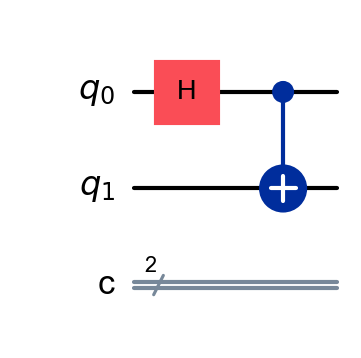


📝 What happened:
   1. Start: |00⟩
   2. H on q0: (|00⟩ + |10⟩)/√2 (superposition of control)
   3. CNOT: (|00⟩ + |11⟩)/√2 (target gets correlated!)

✨ The qubits are now ENTANGLED!


In [7]:
# Create Bell state |Φ+⟩ = (|00⟩ + |11⟩)/√2
qc_bell = QuantumCircuit(2, 2)

# Step 1: Hadamard on control qubit (q0)
qc_bell.h(0)        # |00⟩ → (|00⟩ + |10⟩)/√2

# Step 2: CNOT
qc_bell.cx(0, 1)    # (|00⟩ + |10⟩)/√2 → (|00⟩ + |11⟩)/√2

# Visualize the circuit BEFORE measurement
print("Circuit to create Bell state |Φ+⟩:")
display(qc_bell.draw('mpl'))

print("\n📝 What happened:")
print("   1. Start: |00⟩")
print("   2. H on q0: (|00⟩ + |10⟩)/√2 (superposition of control)")
print("   3. CNOT: (|00⟩ + |11⟩)/√2 (target gets correlated!)")
print("\n✨ The qubits are now ENTANGLED!")

## 📊 VISUALIZATION: Bell State Before Measurement

Statevector of |Φ+⟩:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]

📝 Amplitudes:
   |00⟩: 0.707+0.000j → probability = 50.0%
   |01⟩: 0.000+0.000j → probability = 0.0%
   |10⟩: 0.000+0.000j → probability = 0.0%
   |11⟩: 0.707+0.000j → probability = 50.0%


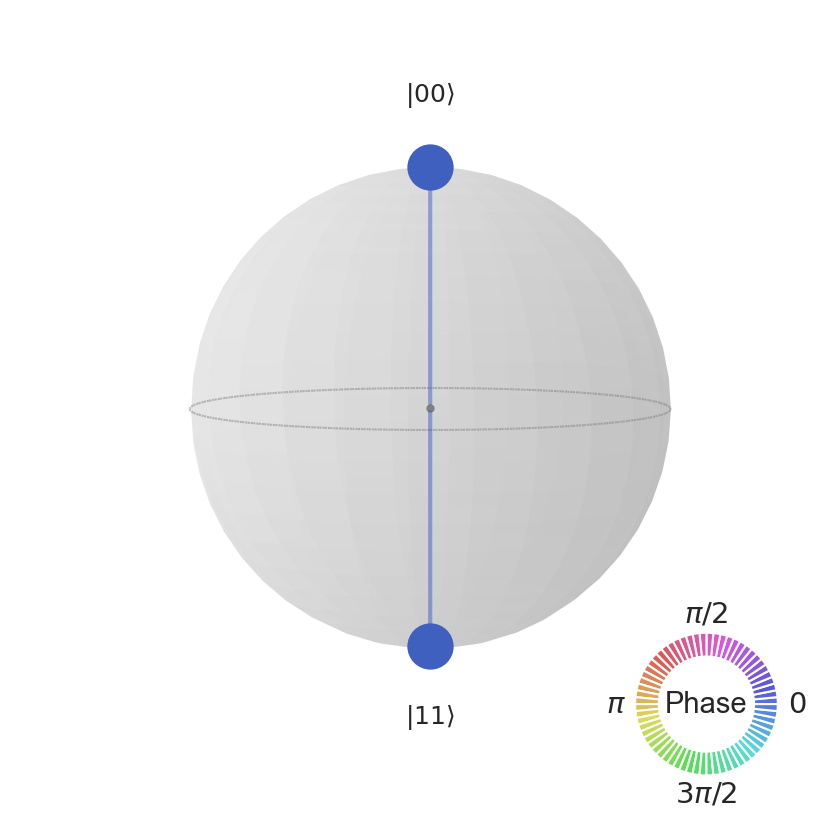


🔍 Notice: Only |00⟩ and |11⟩ have non-zero amplitudes!


In [8]:
# Get the statevector (before measurement)
sv_bell = Statevector(qc_bell)

print("Statevector of |Φ+⟩:")
print(sv_bell.data)
print("\n📝 Amplitudes:")
print(f"   |00⟩: {sv_bell.data[0]:.3f} → probability = {abs(sv_bell.data[0])**2:.1%}")
print(f"   |01⟩: {sv_bell.data[1]:.3f} → probability = {abs(sv_bell.data[1])**2:.1%}")
print(f"   |10⟩: {sv_bell.data[2]:.3f} → probability = {abs(sv_bell.data[2])**2:.1%}")
print(f"   |11⟩: {sv_bell.data[3]:.3f} → probability = {abs(sv_bell.data[3])**2:.1%}")

# Visualize on Q-sphere
display(plot_state_qsphere(sv_bell))

print("\n🔍 Notice: Only |00⟩ and |11⟩ have non-zero amplitudes!")

## 📊 VISUALIZATION: Measuring the Bell State

📊 Measurement results (1000 shots):
   |00>: 504 times (50.4%)
   |11>: 496 times (49.6%)


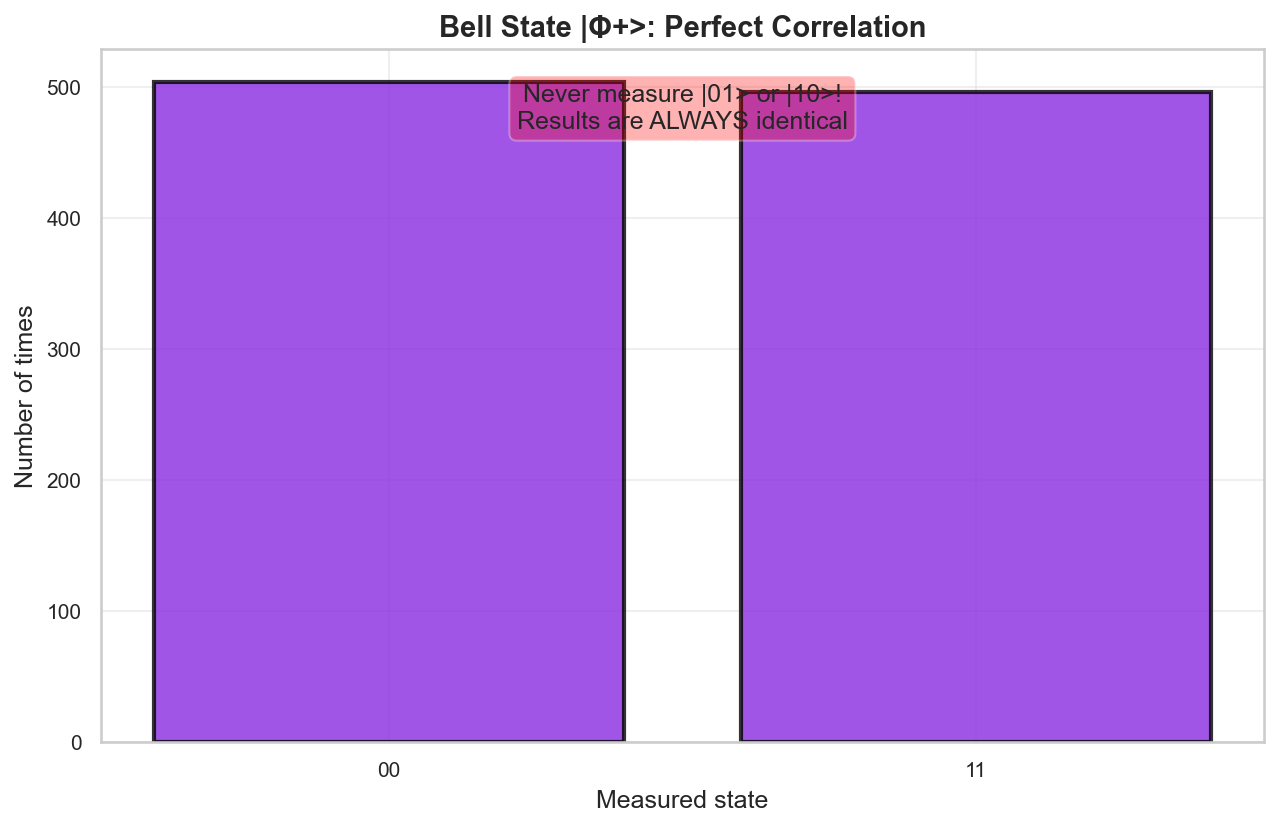


🔗 Quantum correlation demonstrated!
   • 50% chance of |00> (both qubits measure 0)
   • 50% chance of |11> (both qubits measure 1)
   • 0% chance of |01> or |10> (results always match!)

💡 Measuring q0 INSTANTLY determines q1's result!


In [9]:
# Now let's measure and see the statistics
qc_bell_measured = QuantumCircuit(2, 2)
qc_bell_measured.h(0)
qc_bell_measured.cx(0, 1)
qc_bell_measured.measure([0, 1], [0, 1])  # Measure both qubits

# Execute
counts_bell = simulator.run(qc_bell_measured, shots=1000).result().get_counts()

print(f"📊 Measurement results (1000 shots):")
for state, count in sorted(counts_bell.items()):
    print(f"   |{state}>: {count} times ({count/10:.1f}%)")

# Visualization
fig, ax = plt.subplots(figsize=(10, 6), dpi=150)
bars = ax.bar(counts_bell.keys(), counts_bell.values(),
              color=COLORS['quantum'], edgecolor='black', linewidth=2, alpha=0.8)

# Highlight the correlation
ax.set_xlabel('Measured state', fontsize=12)
ax.set_ylabel('Number of times', fontsize=12)
ax.set_title('Bell State |Φ+>: Perfect Correlation', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add annotation
ax.text(0.5, 0.95, 'Never measure |01> or |10>!\nResults are ALWAYS identical',
        transform=ax.transAxes, ha='center', va='top', fontsize=12,
        bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))

plt.show()

print("\n🔗 Quantum correlation demonstrated!")
print("   • 50% chance of |00> (both qubits measure 0)")
print("   • 50% chance of |11> (both qubits measure 1)")
print("   • 0% chance of |01> or |10> (results always match!)")
print("\n💡 Measuring q0 INSTANTLY determines q1's result!")

## 🎯 CHECKPOINT 3: Can you...

- [ ] Explain why H + CNOT creates correlation?
- [ ] Predict that we only measure |00⟩ and |11⟩?
- [ ] Understand this is different from classical correlation?

Perfect! Now let's discover the other 3 Bell states! 🚀

---

## 💡 CONCEPT: The Four Bell States

The state $(|00\rangle + |11\rangle)/\sqrt{2}$ we just created is called **$|\Phi^+\rangle$** (phi-plus).

There are actually **4 Bell states**, all maximally correlated but in different ways!

## Section 6: The Complete Bell Basis

### 🔵 $|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)$

**Circuit**: H on q0, then CNOT  
**Correlation**: Results always **identical** (00 or 11)  
**We just created this one!** ✅

---

### 🟢 $|\Phi^-\rangle = \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle)$

**Circuit**: H on q0, CNOT, then Z on q0 (adds phase)  
**Correlation**: Identical, but with **negative relative phase**  
**Measurement stats**: Same as $|\Phi^+\rangle$ (phase not visible in measurement)

---

### 🟡 $|\Psi^+\rangle = \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle)$

**Circuit**: X on q1, H on q0, then CNOT  
**Correlation**: Results always **opposite** (01 or 10)  
**This is anti-correlation!**

---

### 🔴 $|\Psi^-\rangle = \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle)$

**Circuit**: X on q1, H on q0, CNOT, then Z on q0  
**Correlation**: Opposite, with **negative relative phase**  
**Measurement stats**: Same as $|\Psi^+\rangle$

---

### 📐 Why Are They Important?

Bell states are:
- **Maximally entangled** (strongest possible correlation)
- **Orthogonal** to each other (form a complete basis)
- Foundation of **quantum teleportation** (Notebook 6!)
- Used in **quantum cryptography** (perfectly correlated keys)
- Test **quantum non-locality** (Bell's theorem, Notebook 4!)

## 💻 IMPLEMENTATION: Creating All 4 Bell States

The 4 Bell State Circuits:

|Φ+⟩:


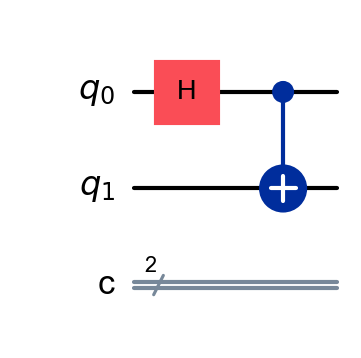


|Φ-⟩:


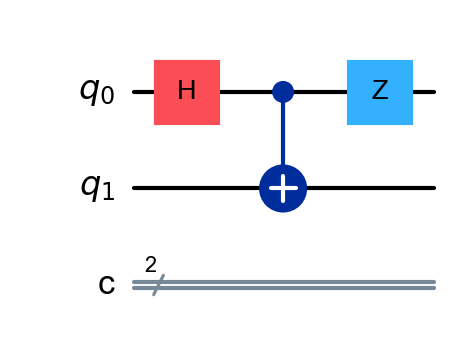


|Ψ+⟩:


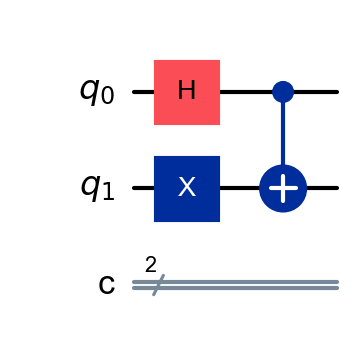


|Ψ-⟩:


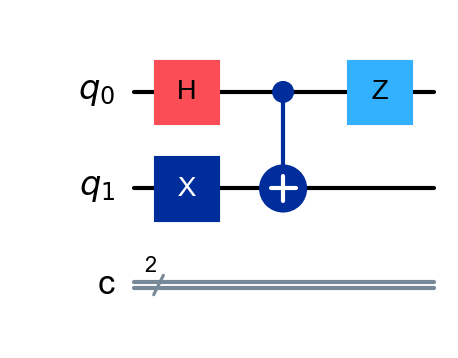

In [10]:
# Functions to create each Bell state

def create_phi_plus():
    """Create |Φ+⟩ = (|00⟩ + |11⟩)/√2"""
    qc = QuantumCircuit(2, 2)
    qc.h(0)        # Hadamard on q0
    qc.cx(0, 1)    # CNOT
    return qc

def create_phi_minus():
    """Create |Φ-⟩ = (|00⟩ - |11⟩)/√2"""
    qc = QuantumCircuit(2, 2)
    qc.h(0)        # Hadamard
    qc.cx(0, 1)    # CNOT
    qc.z(0)        # Z gate adds negative phase to |1⟩ component
    return qc

def create_psi_plus():
    """Create |Ψ+⟩ = (|01⟩ + |10⟩)/√2"""
    qc = QuantumCircuit(2, 2)
    qc.x(1)        # Flip q1 to |1⟩
    qc.h(0)        # Hadamard on q0
    qc.cx(0, 1)    # CNOT
    return qc

def create_psi_minus():
    """Create |Ψ-⟩ = (|01⟩ - |10⟩)/√2"""
    qc = QuantumCircuit(2, 2)
    qc.x(1)        # Flip q1
    qc.h(0)        # Hadamard
    qc.cx(0, 1)    # CNOT
    qc.z(0)        # Add phase
    return qc

# Visualize all 4 circuits
bell_circuits = [
    (create_phi_plus(), '|Φ+⟩'),
    (create_phi_minus(), '|Φ-⟩'),
    (create_psi_plus(), '|Ψ+⟩'),
    (create_psi_minus(), '|Ψ-⟩')
]

print("The 4 Bell State Circuits:\n")
for qc, label in bell_circuits:
    print(f"{label}:")
    display(qc.draw('mpl'))
    print()

## 📊 VISUALIZATION: Measuring All 4 Bell States

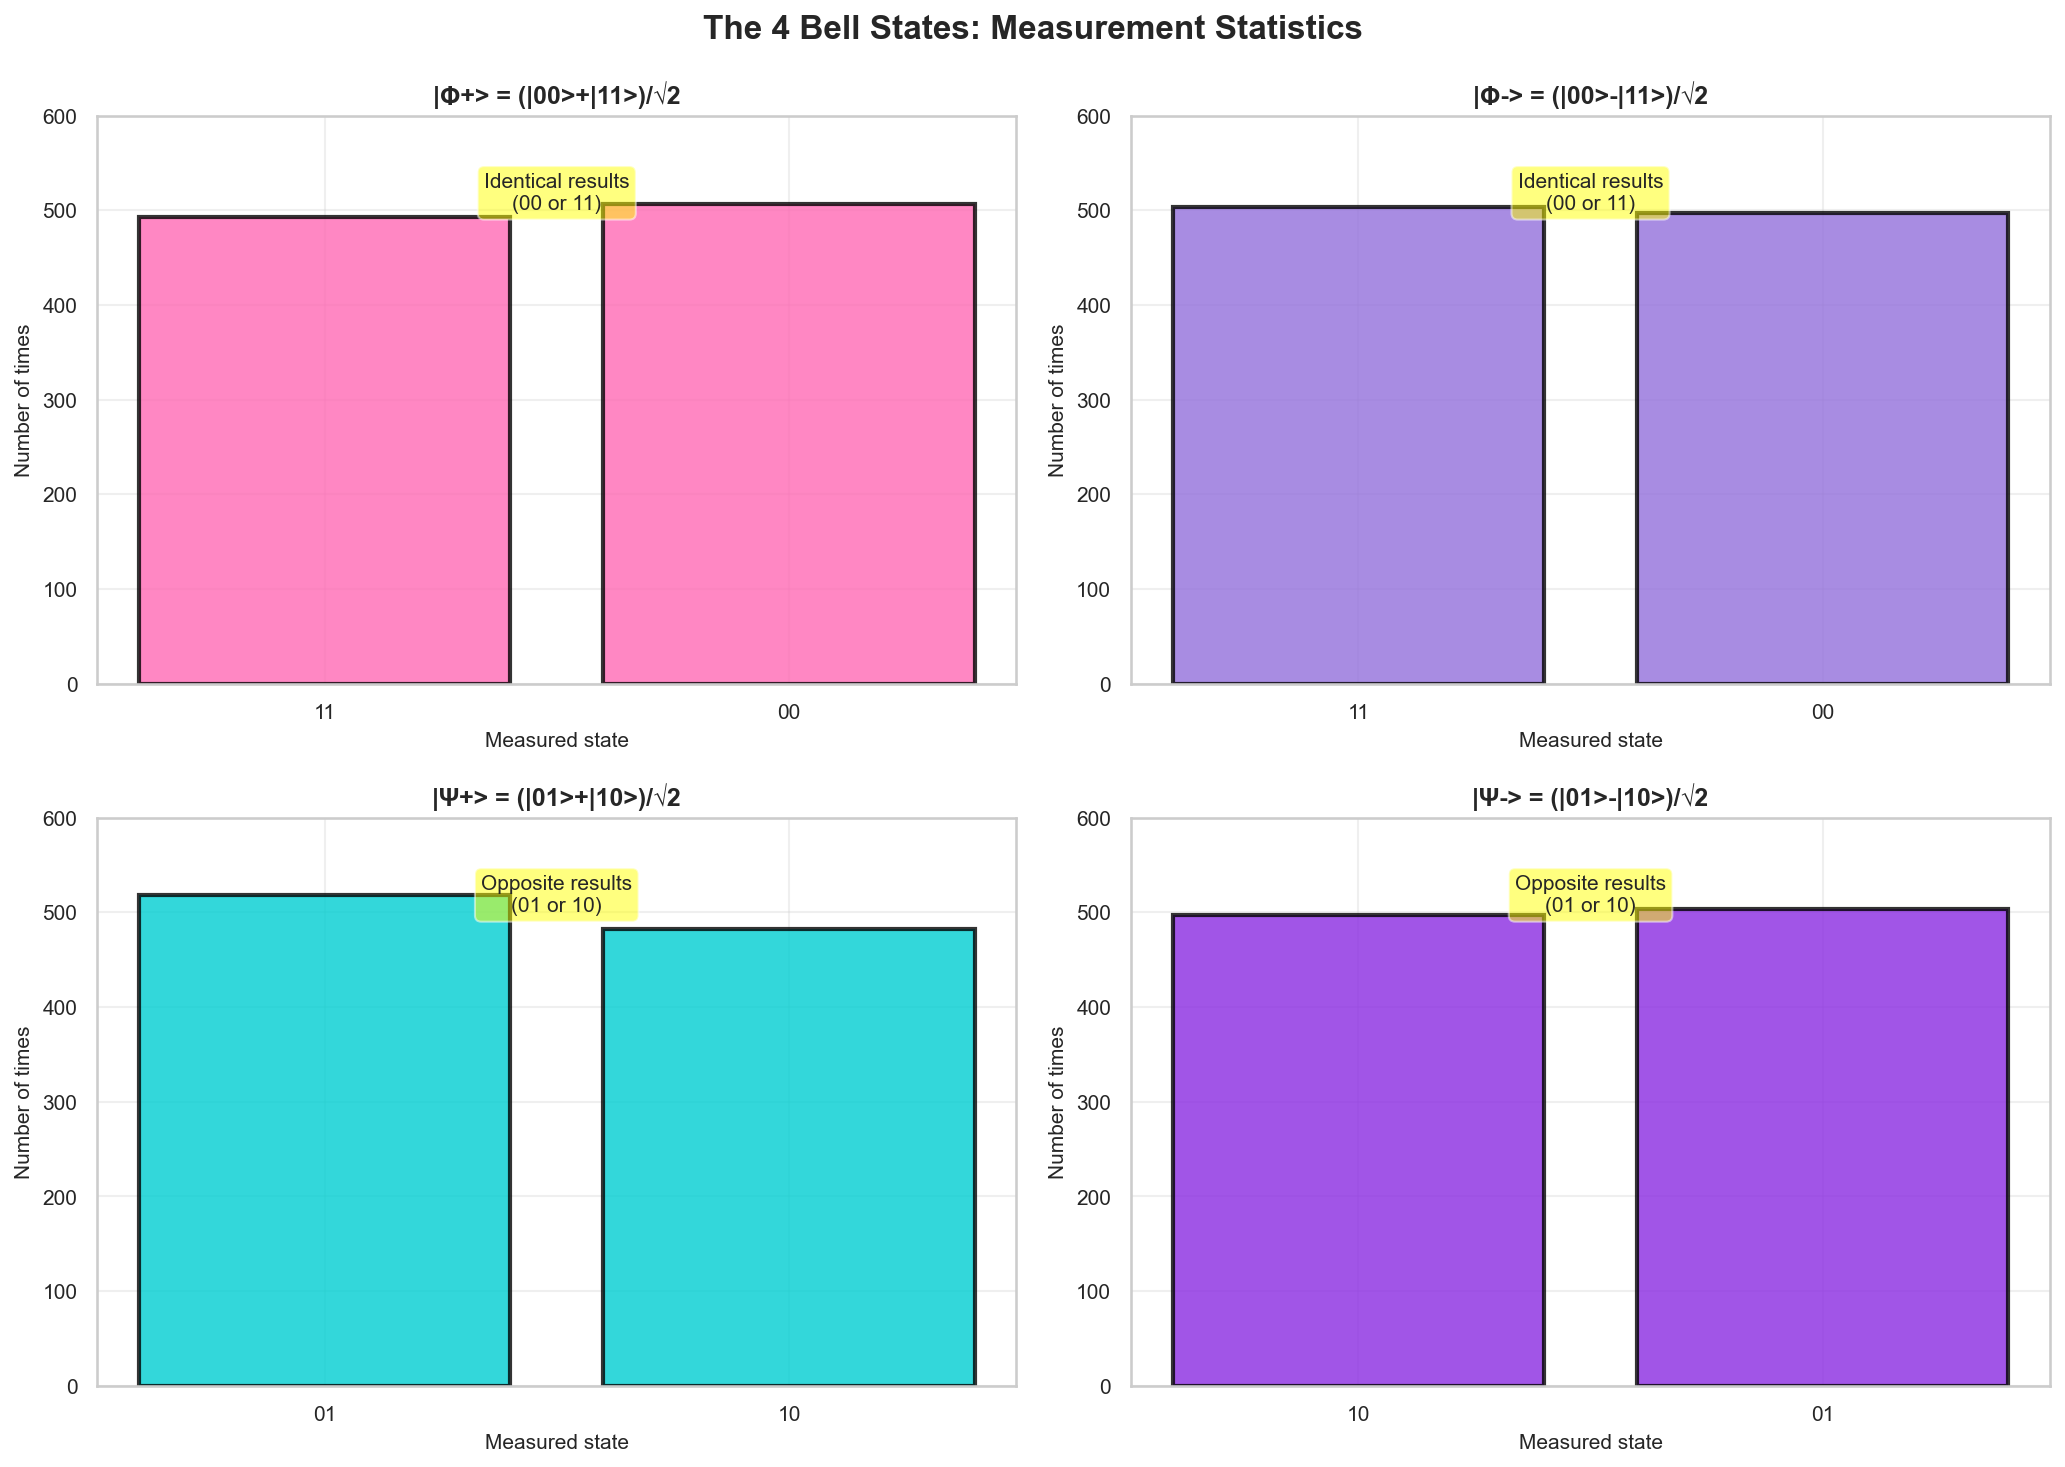


✅ The 4 Bell states measured!

🔵 Φ+ and Φ-: Identical correlation (but Φ- has negative phase)
   → Always measure 00 or 11

🟡 Ψ+ and Ψ-: Anti-correlation (but Ψ- has negative phase)
   → Always measure 01 or 10

📝 Note: The phase difference (+ vs -) doesn't appear in measurement
   But it matters for interference in quantum algorithms!


In [11]:
# Measure all 4 Bell states and compare
fig, axes = plt.subplots(2, 2, figsize=(14, 10), dpi=150)
axes = axes.flatten()

colors = [COLORS['primary'], COLORS['secondary'], COLORS['accent'], COLORS['quantum']]
labels = ['|Φ+> = (|00>+|11>)/√2', '|Φ-> = (|00>-|11>)/√2', 
          '|Ψ+> = (|01>+|10>)/√2', '|Ψ-> = (|01>-|10>)/√2']

for idx, (qc, label) in enumerate(bell_circuits):
    # Add measurement
    qc_measured = qc.copy()
    qc_measured.measure([0, 1], [0, 1])
    
    # Execute
    counts = simulator.run(qc_measured, shots=1000).result().get_counts()
    
    # Plot
    ax = axes[idx]
    ax.bar(counts.keys(), counts.values(), 
           color=colors[idx], edgecolor='black', linewidth=2, alpha=0.8)
    ax.set_title(labels[idx], fontsize=12, fontweight='bold')
    ax.set_xlabel('Measured state', fontsize=10)
    ax.set_ylabel('Number of times', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim([0, 600])
    
    # Add correlation type annotation
    if idx < 2:
        correlation_text = "Identical results\n(00 or 11)"
    else:
        correlation_text = "Opposite results\n(01 or 10)"
    
    ax.text(0.5, 0.9, correlation_text,
            transform=ax.transAxes, ha='center', va='top', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.suptitle('The 4 Bell States: Measurement Statistics', 
             fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ The 4 Bell states measured!")
print("\n🔵 Φ+ and Φ-: Identical correlation (but Φ- has negative phase)")
print("   → Always measure 00 or 11")
print("\n🟡 Ψ+ and Ψ-: Anti-correlation (but Ψ- has negative phase)")
print("   → Always measure 01 or 10")
print("\n📝 Note: The phase difference (+ vs -) doesn't appear in measurement")
print("   But it matters for interference in quantum algorithms!")

## 🎯 CHECKPOINT 4: Can you...

- [ ] Name the 4 Bell states?
- [ ] Create each one with the correct circuit?
- [ ] Explain the difference between Φ states (identical) and Ψ states (opposite)?
- [ ] Understand that phase (+ vs -) doesn't show in measurement directly?

Excellent! Let's explore one more concept... 🚀

---

## 🎯 Exercise 1: No-Cloning Theorem Preview

**Question**: Can we use CNOT to "copy" a qubit?

Imagine we want to copy the state of q0 onto q1:

$$|\psi\rangle|0\rangle \rightarrow |\psi\rangle|\psi\rangle$$

Let's test if CNOT can do this...

### 🟢 Level 1: Test with Basis States

First, let's see if CNOT copies the basis states |0⟩ and |1⟩.

In [12]:
# Test 1: Try to copy |0⟩
print("Test 1: Copying |0⟩")
qc_copy_0 = QuantumCircuit(2, 2)
# q0 starts at |0⟩, q1 starts at |0⟩
qc_copy_0.cx(0, 1)  # Try to copy q0 → q1
qc_copy_0.measure([0, 1], [0, 1])

counts_copy_0 = simulator.run(qc_copy_0, shots=1000).result().get_counts()
print(f"Result: {counts_copy_0}")
print("✅ Success! |0⟩|0⟩ → |0⟩|0⟩ (both are |0⟩)\n")

# Test 2: Try to copy |1⟩
print("Test 2: Copying |1⟩")
qc_copy_1 = QuantumCircuit(2, 2)
qc_copy_1.x(0)      # Prepare |1⟩ on q0
qc_copy_1.cx(0, 1)  # Try to copy
qc_copy_1.measure([0, 1], [0, 1])

counts_copy_1 = simulator.run(qc_copy_1, shots=1000).result().get_counts()
print(f"Result: {counts_copy_1}")
print("✅ Success! |1⟩|0⟩ → |1⟩|1⟩ (both are |1⟩)")

Test 1: Copying |0⟩
Result: {'00': 1000}
✅ Success! |0⟩|0⟩ → |0⟩|0⟩ (both are |0⟩)

Test 2: Copying |1⟩
Result: {'11': 1000}
✅ Success! |1⟩|0⟩ → |1⟩|1⟩ (both are |1⟩)


### 🟡 Level 2: Test with Superposition

Now let's try to copy a **superposition** state |+⟩ = (|0⟩+|1⟩)/√2.

**Predict**: Will we get |+⟩|+⟩?

Test 3: Copying |+⟩ = (|0⟩+|1⟩)/√2

Actual result: {'11': 541, '00': 459}

❌ This is NOT |+>|+>!

We got: (|00>+|11>)/√2 (Bell state Φ+)
Expected: (|00>+|01>+|10>+|11>)/2 (product state |+>|+>)


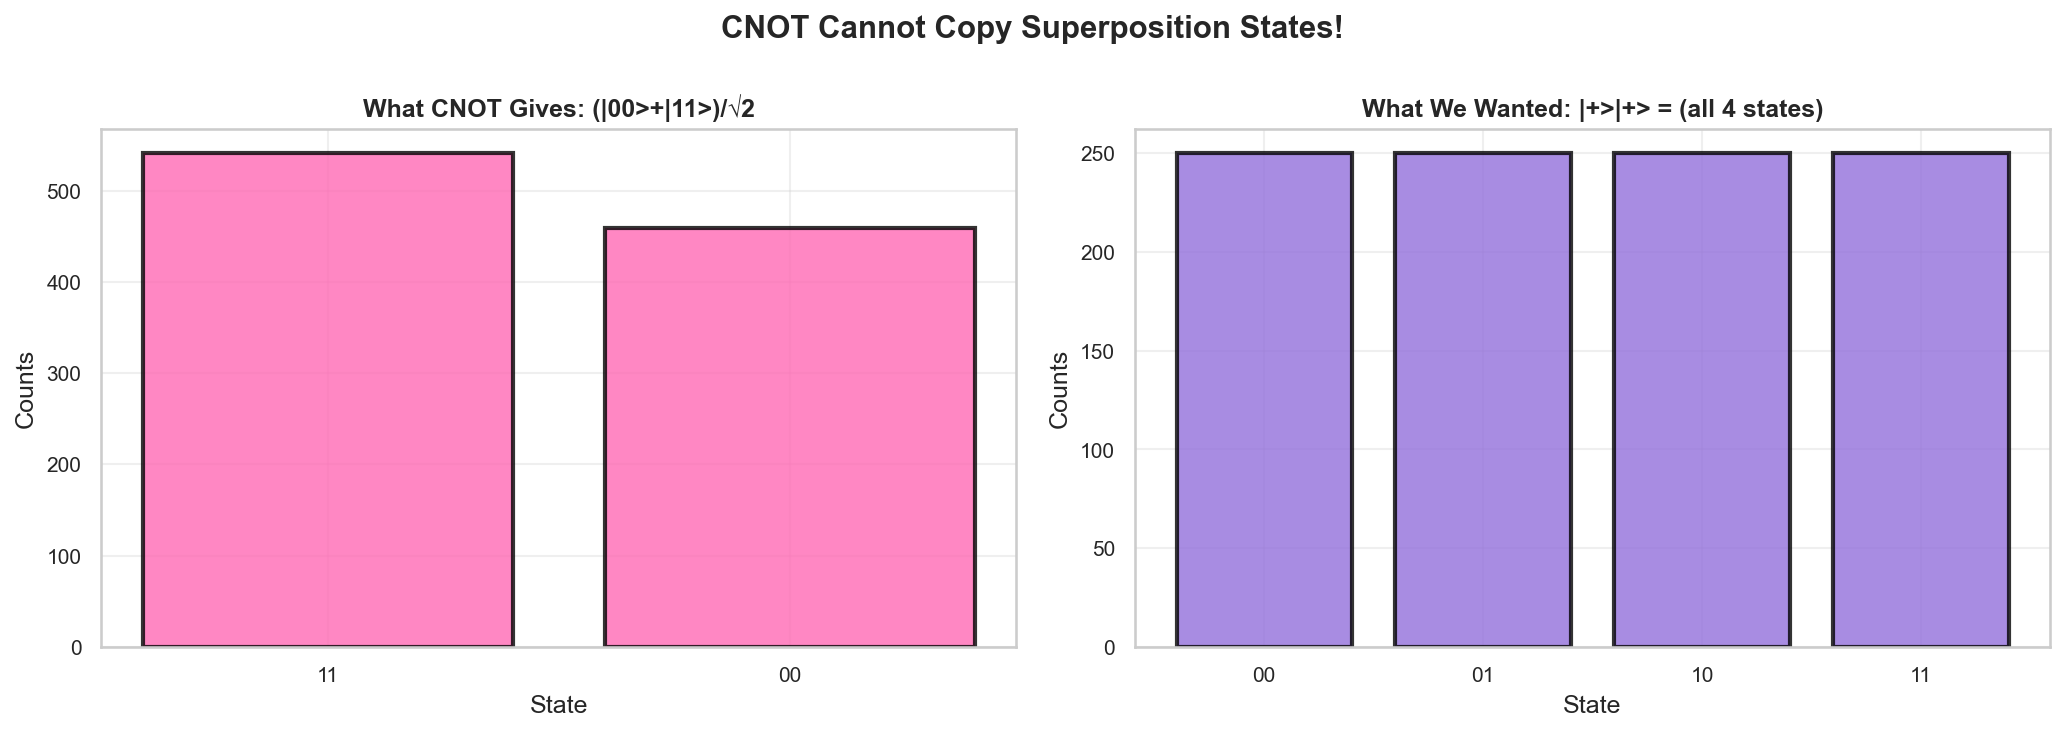


🚫 Conclusion: CNOT only 'copies' basis states, not superpositions!


In [13]:
# Test 3: Try to copy |+⟩
print("Test 3: Copying |+⟩ = (|0⟩+|1⟩)/√2")

# What we WANT: |+⟩|+⟩ = [(|0⟩+|1⟩)/√2] ⊗ [(|0⟩+|1⟩)/√2]
#              = (|00⟩+|01⟩+|10⟩+|11⟩)/2
#              → Should measure all 4 states with 25% each

# What CNOT actually does:
qc_copy_plus = QuantumCircuit(2, 2)
qc_copy_plus.h(0)      # Create |+⟩ on q0: (|0⟩+|1⟩)/√2
qc_copy_plus.cx(0, 1)  # Apply CNOT
qc_copy_plus.measure([0, 1], [0, 1])

counts_copy_plus = simulator.run(qc_copy_plus, shots=1000).result().get_counts()

print(f"\nActual result: {counts_copy_plus}")
print("\n❌ This is NOT |+>|+>!")
print("\nWe got: (|00>+|11>)/√2 (Bell state Φ+)")
print("Expected: (|00>+|01>+|10>+|11>)/2 (product state |+>|+>)")

# Visualize the difference
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), dpi=150)

# What we got (actual)
ax1.bar(counts_copy_plus.keys(), counts_copy_plus.values(),
        color=COLORS['primary'], edgecolor='black', linewidth=2, alpha=0.8)
ax1.set_title('What CNOT Gives: (|00>+|11>)/√2', fontsize=12, fontweight='bold')
ax1.set_xlabel('State')
ax1.set_ylabel('Counts')
ax1.grid(axis='y', alpha=0.3)

# What we wanted (expected)
expected_states = ['00', '01', '10', '11']
expected_counts = [250, 250, 250, 250]  # All equal if it were |+⟩|+⟩
ax2.bar(expected_states, expected_counts,
        color=COLORS['secondary'], edgecolor='black', linewidth=2, alpha=0.8)
ax2.set_title('What We Wanted: |+>|+> = (all 4 states)', fontsize=12, fontweight='bold')
ax2.set_xlabel('State')
ax2.set_ylabel('Counts')
ax2.grid(axis='y', alpha=0.3)

plt.suptitle('CNOT Cannot Copy Superposition States!', fontsize=15, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n🚫 Conclusion: CNOT only 'copies' basis states, not superpositions!")

### 🔴 Level 3: Understanding the No-Cloning Theorem

**What we discovered**:
- CNOT can "copy" |0⟩ → |0⟩|0⟩ ✅
- CNOT can "copy" |1⟩ → |1⟩|1⟩ ✅
- CNOT **cannot** copy |+⟩ → |+⟩|+⟩ ❌

**The No-Cloning Theorem** states:

> It is **impossible** to create a quantum circuit that can copy an **arbitrary unknown** quantum state.

**Why?**

Quantum operations are **linear**. If we had a cloning circuit that works:
- $|0\rangle|0\rangle \rightarrow |0\rangle|0\rangle$ (copy |0⟩)
- $|1\rangle|0\rangle \rightarrow |1\rangle|1\rangle$ (copy |1⟩)

Then by linearity, on superposition:
$$\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)|0\rangle \rightarrow \frac{1}{\sqrt{2}}(|0\rangle|0\rangle + |1\rangle|1\rangle)$$

But this is NOT equal to:
$$\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \otimes \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle) = \frac{1}{2}(|00\rangle + |01\rangle + |10\rangle + |11\rangle)$$

**Consequences**:
- 🚫 Can't copy quantum information perfectly
- ✅ But we CAN **teleport** it (Notebook 6!)
- 🔐 Makes quantum cryptography secure (can't clone the key)
- 🎯 Forces us to use different quantum algorithms

---

## 🎯 Quick Quiz

Test your understanding!

**1. With 2 qubits, how many basis states exist?**
- [ ] 2
- [x] 4
- [ ] 8

**2. CNOT with control=0 does what to the target?**
- [x] Nothing
- [ ] Flips it
- [ ] Applies Hadamard

**3. What is (|00⟩ + |11⟩)/√2?**
- [x] Bell state |Φ+⟩
- [ ] Bell state |Ψ+⟩
- [ ] Not a Bell state

**4. In Bell state |Φ+⟩, can we measure |01⟩?**
- [ ] Yes, 25% probability
- [ ] Yes, 50% probability
- [x] No, impossible

**5. Which circuit creates |Ψ+⟩ = (|01⟩+|10⟩)/√2?**
- [ ] H then CNOT
- [x] X on q1, H on q0, then CNOT
- [ ] CNOT then H

**6. Can CNOT copy an arbitrary quantum state?**
- [ ] Yes, always
- [x] No, only basis states (no-cloning theorem)
- [ ] Yes, but only superposition states

**7. What makes Bell states special?**
- [ ] They're easy to create
- [ ] They have no phase
- [x] They're maximally entangled

## 🎯 FINAL CHECKPOINT: Can you...

Before moving to the next notebook, verify you can:

- [ ] Create a 2-qubit circuit?
- [ ] Apply CNOT with correct control/target?
- [ ] Predict CNOT behavior on all 4 basis states?
- [ ] Explain how H + CNOT creates correlation?
- [ ] Create all 4 Bell states?
- [ ] Distinguish between Φ states (identical) and Ψ states (opposite)?
- [ ] Understand why CNOT can't copy superposition states?

If yes to all, congratulations! You've mastered 2-qubit systems! 🎉

---

## 🎓 Notebook 3 Summary

**What you learned:**
✅ 2-qubit systems have 4 basis states, exponentially growing state space  
✅ CNOT gate: conditional bit flip based on control qubit  
✅ CNOT + Hadamard creates quantum correlation  
✅ The 4 Bell states: Φ+, Φ-, Ψ+, Ψ-  
✅ Quantum correlations are different from classical  
✅ No-cloning theorem: can't copy arbitrary quantum states  

**Progress**: ⬛⬛⬛⬛⬜⬜⬜ (4/7 completed)

---

## 🚀 Next Step: Notebook 4 - Entanglement

We've created correlated qubits with Bell states.  
Now we'll understand **WHY** these correlations are **impossible classically**.

**Coming up**:
- Classical vs quantum correlations in detail
- Measuring qubits in different bases
- Bell test (CHSH inequality)
- **Prove that nature is quantum!** 🤯

We'll see Einstein be proven wrong! This is where quantum mechanics gets truly mind-bending.

See you soon! 🎉